In [1]:
import numpy as np
import pandas as pd


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from zodiac.zodiac import Zodiac

In [2]:
test = pd.read_csv('data/mnist_test.csv')
train = pd.read_csv('data/mnist_train.csv')

In [3]:
train_x = train['label']
test_x = test['label']

In [4]:
from sklearn.svm import SVC
del train["label"]
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train, train_x) 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [5]:
res = np.array(test["label"])
del test["label"]
a = clf.predict(test)

In [6]:
zod = Zodiac(train_data=train,test_data=test,test_labels=res, test_predictions=a,dim_red="PCA")

/Users/apoorvashetty/ze/zodiac/zodiac.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["labels"] = test_labels
/Users/apoorvashetty/ze/zodiac/zodiac.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["predictions"] = test_predictions


In [7]:
zod.metrics(metrics=["f1","accuracy"])

In [8]:
zod.split_manual_grid(h=100)

/Users/apoorvashetty/ze/zodiac/zodiac.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["color"] = self.test_data["labels"] == self.test_data["predictions"]
/Users/apoorvashetty/ze/zodiac/zodiac.py:191: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)
/Users/apoorvashetty/ze/zodiac/zodiac.py:201: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future vers

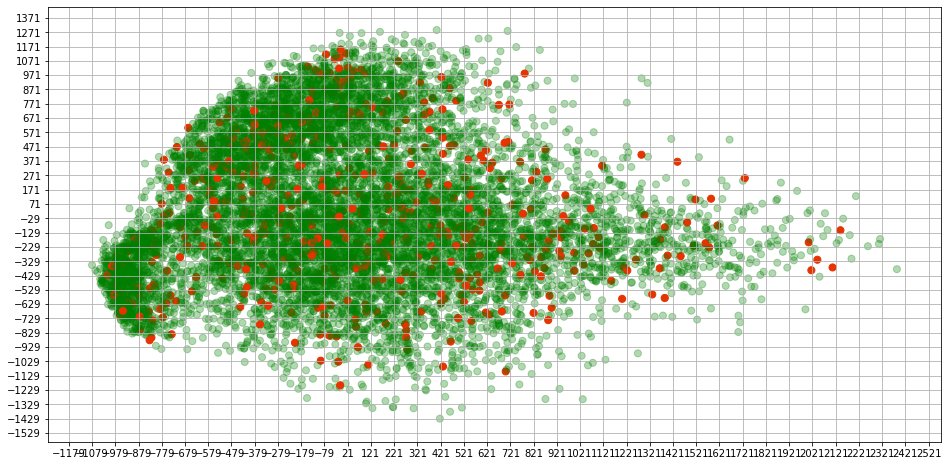

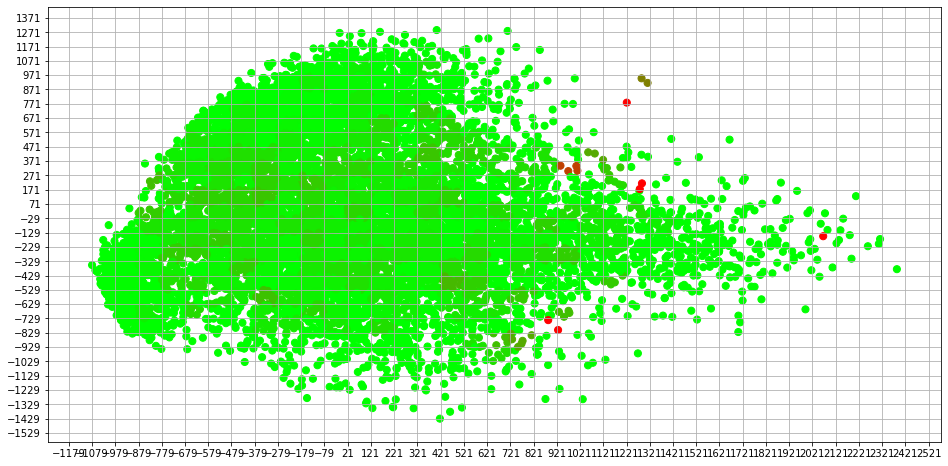

In [9]:
zod.split_plot("accuracy")